<a href="https://colab.research.google.com/github/usernamenotfound789/Creditcard-Fraud-Detection/blob/master/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
# accessing the data
df = pd.read_csv('/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.shape

(284807, 31)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
df.Class.unique()

array([0, 1])

In [50]:
#Uneven class distribution
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [51]:
nf = df[df.Class==0]
f = df[df.Class==1]


In [52]:
#Extracting  random entries from class-0
nf = nf.sample(738)

In [53]:
#Creating new entries from dataframe
data = f.append(nf,ignore_index=True)

In [54]:
data.shape

(1230, 31)

In [55]:
X = data.drop(['Class'],axis=1)
y=data['Class']

In [56]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
X_train.shape,X_test.shape

((984, 30), (246, 30))

In [57]:
#Applying StandardScaler to obtain all the features in similar range
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [58]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [59]:
#Reshaping input to 3D
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)



In [60]:
#CNN Model
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [62]:
#Compiling and fiting
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 0s 11ms/step - loss: 0.6287 - accuracy: 0.7327 - val_loss: 0.5652 - val_accuracy: 0.8943
Epoch 2/20
31/31 [==============================] - 0s 8ms/step - loss: 0.4119 - accuracy: 0.8618 - val_loss: 0.5129 - val_accuracy: 0.8862
Epoch 3/20
31/31 [==============================] - 0s 8ms/step - loss: 0.3625 - accuracy: 0.8770 - val_loss: 0.4757 - val_accuracy: 0.9106
Epoch 4/20
31/31 [==============================] - 0s 8ms/step - loss: 0.3101 - accuracy: 0.9045 - val_loss: 0.4422 - val_accuracy: 0.9472
Epoch 5/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2914 - accuracy: 0.8933 - val_loss: 0.3946 - val_accuracy: 0.9512
Epoch 6/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2894 - accuracy: 0.9035 - val_loss: 0.3462 - val_accuracy: 0.9512
Epoch 7/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2688 - accuracy: 0.9055 - val_loss: 0.3006 - val_accuracy: 0.9553
Epoch 8/20
31/31 [=

In [64]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

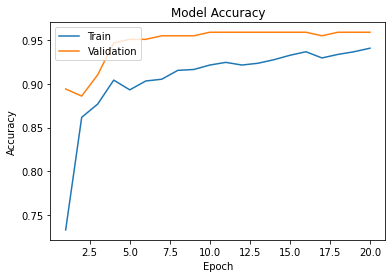

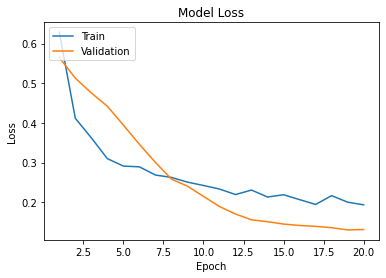

In [65]:
plotLearningCurve(history,20)